# Polynomial Regression vs Linear Regression

## Import libraries and dataset

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset = pd.read_csv('cars.csv')
X_year = dataset.iloc[:, 1:2].values
X_km = dataset.iloc[:, 4:5].values
y = dataset.iloc[:, -1].values







## Training the Linear Regression model

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg_year = LinearRegression()
lin_reg_km = LinearRegression()
lin_reg_year.fit(X_year, y)
lin_reg_km.fit(X_km, y)

LinearRegression()

## Training the Polynomial Regression model

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree= 3)

X_year_poly = poly_reg.fit_transform(X_year)
X_km_poly = poly_reg.fit_transform(X_km)

lin_reg_year_2 = LinearRegression()
lin_reg_year_2.fit(X_year_poly, y)

lin_reg_km_2 = LinearRegression()
lin_reg_km_2.fit(X_km_poly, y)

LinearRegression()

## Visualising the Linear Regression results Year

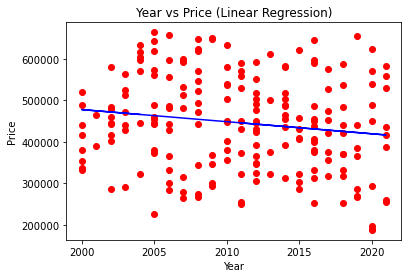

In [49]:
plt.scatter(X_year, y, color = 'red')
plt.plot(X_year, lin_reg_year.predict(X_year), color = 'blue')
plt.title('Year vs Price (Linear Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Linear Regression results km

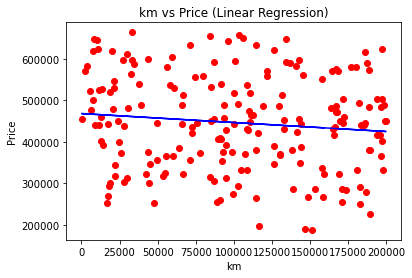

In [50]:
plt.scatter(X_km, y, color = 'red')
plt.plot(X_km, lin_reg_km.predict(X_km), color = 'blue')
plt.title('km vs Price (Linear Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results year

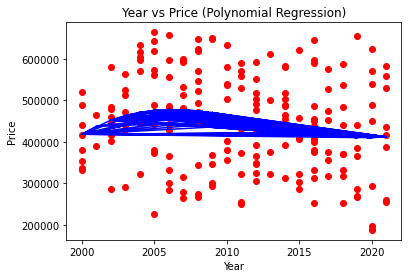

In [51]:
plt.scatter(X_year, y, color = 'red')
plt.plot(X_year, lin_reg_year_2.predict(X_year_poly), color = 'blue')
plt.title('Year vs Price (Polynomial Regression)')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

## Visualising the Polynomial Regression results km

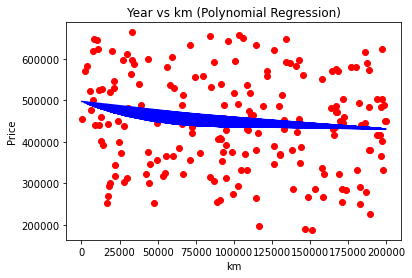

In [52]:
plt.scatter(X_km, y, color = 'red')
plt.plot(X_km, lin_reg_km_2.predict(X_km_poly), color = 'blue')
plt.title('Year vs km (Polynomial Regression)')
plt.xlabel('km')
plt.ylabel('Price')
plt.show()

## Predicting a new result with Linear Regression

In [53]:
result_year = lin_reg_year.predict([[2017]])

result_km = lin_reg_km.predict([[25000]])

display(result_year)
display(result_km)

array([428356.86908753])

array([462939.66890923])

## Predicting a new result with Polynomial Regression

In [54]:
result_year = lin_reg_year_2.predict(poly_reg.fit_transform([[2017]]))
result_km = lin_reg_km_2.predict(poly_reg.fit_transform([[25000]]))

display(result_year)
display(result_km)

array([416925.76184082])

array([467019.04050043])